In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

palette = sns.color_palette(["#2176AB", "#F97662", "#FC9B31", "#FFBF00", "#50C878", "#B284BE"])
sns.set(style="whitegrid")
sns.set_palette(palette)
gradient_palette = sns.blend_palette(['#ECF7FE', palette[0]], as_cmap=True)

# Carica il CSV in un DataFrame
df = pd.read_csv("../../output/scores.csv")
df = df[df["Dataset"] == "ST002498"].drop(columns=["Dataset"])
df

,Model,auc,accuracy,fpr,tpr
1,AdaBoost,"[0.5554435483870969, 0.6522177419354839, 0.563...","[0.5238095238095238, 0.6031746031746031, 0.539...","[[0.0, 0.0, 0.0, 0.03225806451612903, 0.064516...","[[0.0, 0.03125, 0.0625, 0.0625, 0.0625, 0.0937..."
3,KNN,"[0.5670362903225806, 0.5191532258064516, 0.632...","[0.5714285714285714, 0.5238095238095238, 0.634...","[[0.0, 0.7096774193548387, 1.0], [0.0, 0.77419...","[[0.0, 0.84375, 1.0], [0.0, 0.8125, 1.0], [0.0..."
5,LDA,"[0.5514112903225806, 0.6209677419354839, 0.572...","[0.5238095238095238, 0.6349206349206349, 0.555...","[[0.0, 0.03225806451612903, 0.0322580645161290...","[[0.0, 0.0, 0.03125, 0.0625, 0.09375, 0.125, 0..."
7,Log-reg,"[0.5161290322580645, 0.6713709677419355, 0.550...","[0.5238095238095238, 0.6507936507936508, 0.619...","[[0.0, 0.03225806451612903, 0.0322580645161290...","[[0.0, 0.0, 0.03125, 0.03125, 0.0625, 0.09375,..."
9,RBF-SVM,"[0.655241935483871, 0.7278225806451614, 0.5987...","[0.6190476190476191, 0.6507936507936508, 0.555...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.03125, 0.0625, 0.09375, 0.125, 0.1562..."
11,RF,"[0.6693548387096774, 0.7152217741935484, 0.597...","[0.6507936507936508, 0.6666666666666666, 0.603...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.03225806451612903...","[[0.0, 0.03125, 0.0625, 0.09375, 0.125, 0.125,..."
13,SVM-lin,"[0.5932459677419355, 0.6663306451612903, 0.532...","[0.5238095238095238, 0.6507936507936508, 0.571...","[[0.0, 0.03225806451612903, 0.0322580645161290...","[[0.0, 0.0, 0.03125, 0.0625, 0.0625, 0.09375, ..."
15,XGB,"[0.6643145161290323, 0.6612903225806451, 0.520...","[0.6349206349206349, 0.6507936507936508, 0.555...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03...","[[0.0, 0.03125, 0.0625, 0.09375, 0.125, 0.1562..."
17,PLS-DA,"[0.5796370967741935, 0.6290322580645161, 0.604...","[0.5396825396825397, 0.5873015873015873, 0.587...","[[0.0, 0.03225806451612903, 0.0322580645161290...","[[0.0, 0.0, 0.03125, 0.0625, 0.09375, 0.125, 0..."


In [2]:
df['auc'] = df['auc'].apply(eval)

# Transpose DataFrame and set column names
df_auc = df[['Model']].T
df_auc.columns = df_auc.iloc[0]
df_auc = df_auc.drop(df_auc.index[0]).reset_index(drop=True)

# Assign accuracy values to respective columns
for col, auc in zip(df_auc.columns, df['auc']):
    df_auc[col] = auc

sorted_models = df_auc.mean().sort_values().index
# Convert 'Model' column to a categorical data type with custom order
df['Model'] = pd.Categorical(df['Model'], categories=sorted_models, ordered=True)

# Sort 'Model' column according to the custom order
df.sort_values(by='Model', inplace=True)

Roc Curve

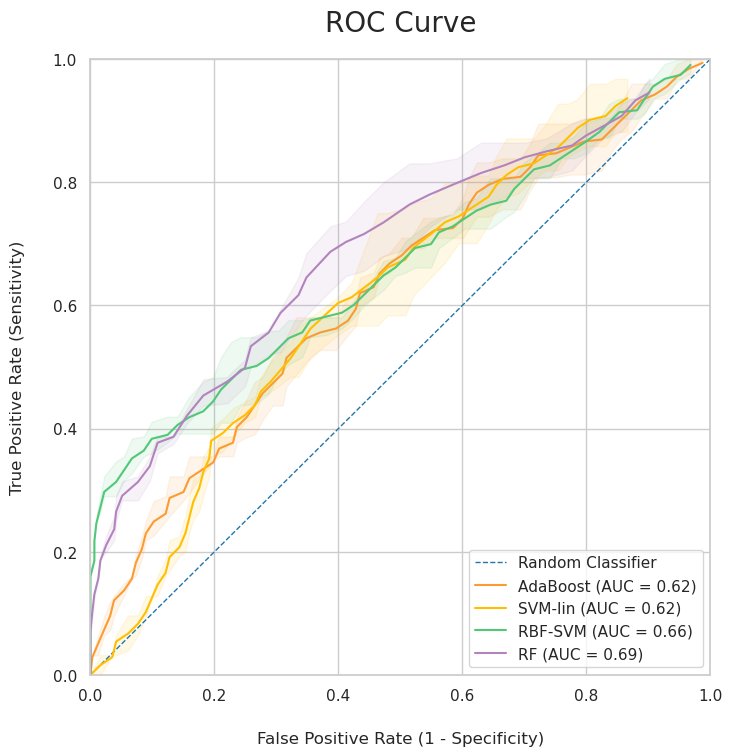

In [3]:
from numpy import asanyarray

df['tpr'] = df['tpr'].apply(eval)
df['fpr'] = df['fpr'].apply(eval)

models = asanyarray(df['Model'].unique())

plt.figure(figsize=(8, 8))
# plotting the random line
plt.plot([0, 1], [0, 1], lw=1, linestyle='--', label='Random Classifier')

for i, model in enumerate(models[-4:]):
    fpr = df[df['Model'] == model]['fpr'].values[0]
    tpr = df[df['Model'] == model]['tpr'].values[0]
    auc = df[df['Model'] == model]['auc'].values[0]

    max_length_fpr = min([len(lst) for lst in fpr])
    max_length_tpr = min([len(lst) for lst in tpr])
    fpr = [lst[:max_length_fpr] for lst in fpr]
    tpr = [lst[:max_length_tpr] for lst in tpr]

    mean_fpr = np.mean(fpr, axis=0)
    mean_tpr = np.mean(tpr, axis=0)
    mean_auc = np.mean(auc)

    percentile_25_tpr = np.percentile(tpr, 25, axis=0)
    percentile_75_tpr = np.percentile(tpr, 75, axis=0)

    # Plot ROC curve, color gradient based on AUC
    plt.plot(mean_fpr, mean_tpr,
             label=f'{model} (AUC = {mean_auc:.2f})',
             color=palette[(i + 2) % len(palette)])

    plt.fill_between(mean_fpr, percentile_25_tpr, percentile_75_tpr,
                     alpha=0.1,
                     color=palette[(i + 2) % len(palette)])

# Personalizza il grafico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)', labelpad=20)
plt.ylabel('True Positive Rate (Sensitivity)', labelpad=20)
plt.title('ROC Curve', fontsize=20, pad=20)
plt.legend(loc='lower right')
plt.show()

In [4]:
# Convert accuracy strings to lists
df['accuracy'] = df['accuracy'].apply(eval)

# Transpose DataFrame and set column names
df_acc = df[['Model']].T
df_acc.columns = df_acc.iloc[0]
df_acc = df_acc.drop(df_acc.index[0]).reset_index(drop=True)

# Assign accuracy values to respective columns
for col, acc in zip(df_acc.columns, df['accuracy']):
    df_acc[col] = acc


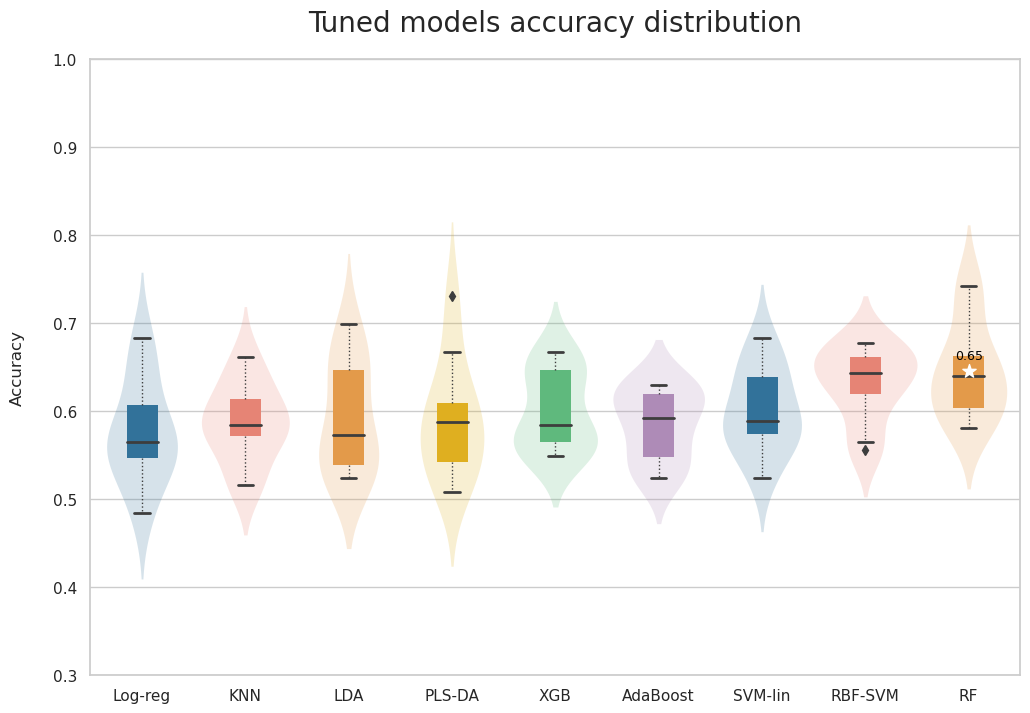

In [5]:

# Create boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_acc, linewidth=0, width=0.3, palette=palette,
            medianprops=dict(linestyle='-', linewidth=2),
            boxprops=dict(linewidth=0, alpha=1),
            whiskerprops=dict(linestyle=':', linewidth=1),
            capprops=dict(linestyle='-', linewidth=2))
sns.violinplot(data=df_acc, linewidth=0, alpha=0.3, width=1, palette=palette)
plt.setp(plt.gca().collections, alpha=.2)

# text annotation on best model
best_model = df_acc.mean().idxmax()
best_accuracy = df_acc.mean().max()
plt.text(df_acc.columns.get_loc(best_model), best_accuracy + 0.01, f'{best_accuracy:.2f}', ha='center', va='bottom',
         fontsize=9, color='black')
plt.scatter(df_acc.columns.get_loc(best_model), best_accuracy, s=100, zorder=10, color='white', marker='*')
plt.yticks(np.arange(0.3, 1.1, 0.1))
plt.ylabel('Accuracy', labelpad=20)
plt.xlabel('', labelpad=20)
plt.title('Tuned models accuracy distribution', fontsize=20, pad=20)
plt.show()